In [1]:
import torch

In [2]:
if(torch.cuda.is_available()):
    device = torch.device("cuda")
    print(device, torch.cuda.get_device_name(0))
else:
    device= torch.device("cpu")
    print(device)

cuda Tesla T4


# Build NN

In [3]:
import torch.nn as nn

In [4]:
MyNet = nn.Sequential(
    nn.Linear(1, 200),
    nn.ReLU(),
    nn.Linear(200, 150),
    nn.ReLU(),
    nn.Linear(150, 1),
)
MyNet.to(device)
print(MyNet)

Sequential(
  (0): Linear(in_features=1, out_features=200, bias=True)
  (1): ReLU()
  (2): Linear(in_features=200, out_features=150, bias=True)
  (3): ReLU()
  (4): Linear(in_features=150, out_features=1, bias=True)
)


In [5]:
for name, param in MyNet.named_parameters():
  print(name, end=" ,")

0.weight ,0.bias ,2.weight ,2.bias ,4.weight ,4.bias ,

In [6]:
# save the initial model parameters of this un-trained NN
torch.save(MyNet.state_dict(), "InitialWeights.dat")

In [7]:
from torchsummary import summary
summary(MyNet, input_size=(10, 1))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1              [-1, 10, 200]             400
              ReLU-2              [-1, 10, 200]               0
            Linear-3              [-1, 10, 150]          30,150
              ReLU-4              [-1, 10, 150]               0
            Linear-5                [-1, 10, 1]             151
Total params: 30,701
Trainable params: 30,701
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.05
Params size (MB): 0.12
Estimated Total Size (MB): 0.17
----------------------------------------------------------------


In [8]:
loss_func = torch.nn.MSELoss()

In [9]:
optimizer = torch.optim.Adam(MyNet.parameters(), lr=0.005)

#Generate data

In [10]:
import random
lstX = []
lstY = []
for x in range(-100, 100, 5):
  lstX.append([x])
  y = 3*x + random.uniform(0, 1)*100
  lstY.append([y])

In [11]:
import numpy as np
numpyX = np.array(lstX)
numpyY = np.array(lstY)
print(numpyX.shape, numpyY.shape)

(40, 1) (40, 1)


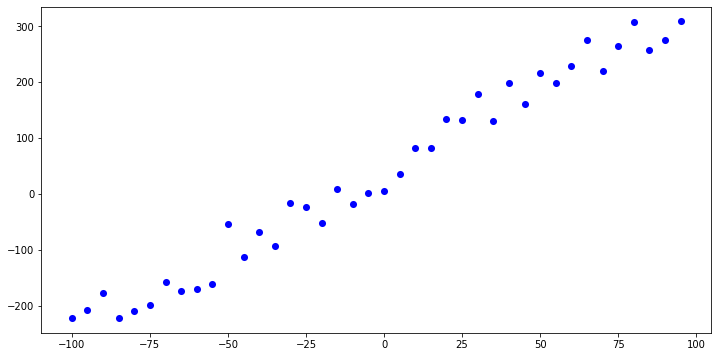

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.scatter(numpyX, numpyY, s=50, lw=0, color = "blue")
plt.show()

# Collect variance of model's predicting errors 

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
lossLst = []
for i in range(300):
  trainX, testX, trainY_hat, testY_hat = train_test_split(numpyX, numpyY, test_size=0.20, random_state=0)
  tensorX = torch.FloatTensor(trainX).to(device)
  tensorY_hat = torch.FloatTensor(trainY_hat).to(device)
  if(i%20==0):
    print(i+1, end = " ,")
  MyNet.load_state_dict(torch.load('InitialWeights.dat')) #Use the same initial model parameters
  for epoch in range(1, 500):
      tensorY = MyNet(tensorX)
      loss = loss_func(tensorY_hat, tensorY)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
  test_tensorX = torch.FloatTensor(testX).to(device)
  test_tensorY_hat = torch.FloatTensor(testY_hat).to(device)
  test_tensorY = MyNet(test_tensorX)
  loss = loss_func(test_tensorY, test_tensorY_hat)
  lossLst.append(float(loss))

1 ,21 ,41 ,61 ,81 ,101 ,121 ,141 ,161 ,181 ,201 ,221 ,241 ,261 ,281 ,

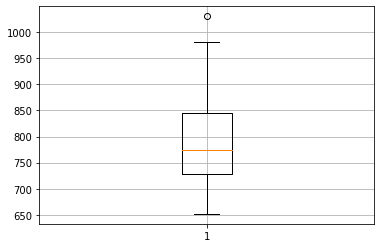

In [15]:
plt.boxplot(lossLst)
plt.grid()
plt.show()